# Intro to PyTorch

So far we have manually been working with weights, biases, activation functions, and plugging in inputs. What you may have noticed is that there is a pattern to these operations with neural networks. Essentially these neural net operations are a series of matrix operations. With the rise in popularity of NN's and machine learning several libraries emerged to provide large matrix operation support and various ML functions.

TensorFlow and PyTorch are the most popular with recent years seeing PyTorch grow as the go to ML framework. PyTorch has support for tensors (multi-dimensional matricies), NN construction, working with datasets, and learning processes. We will play around with some of the building blocks of PyTorch before we put it all together and make our own NN.

## Tensors

Tensors are the building blocks of most actions in PyTorch, our data will be represented as tensors, our weights can be tensors, they are very important. You'll likely spending a lot of time initially playing with the dimensionality of your tensors to have them match a target shape.

In [1]:
import torch
import numpy as np

# Lets represent a series of 2D points as a tensor to start
points = torch.tensor([[1, 2], [2, 3], [4, 5]])

"Shape" tells us how our tensor is layed out, this becomes very important when we start to apply operations on our tensors because operations between tensors require their shape to match.

In [2]:
points.shape

torch.Size([3, 2])

This tells us that we have a tensor that is 3x2 in shape

Tensors in PyTorch operate very similarly to numpy arrays and intend there is good compatibility between the two. As with numpy we can perform operations on PyTorch tensors.

In [3]:
points * 3

tensor([[ 3,  6],
        [ 6,  9],
        [12, 15]])

What about things like images? Well we could represent a color image by a C-by-H-by-W where "C" are the number of color channels, "H" is the height and "W" is the width

In [5]:
from torchvision.io import decode_image

img = decode_image('../data/street_view.png')

img.shape

torch.Size([4, 357, 630])

However, sometimes we want to represent images in different formats. For example, OpenCV has images in the format H-W-C. We can use PyTorch's permute operation and convert directly to numpy if we need to perform OpenCV operations.

torch.Size([357, 630, 4])

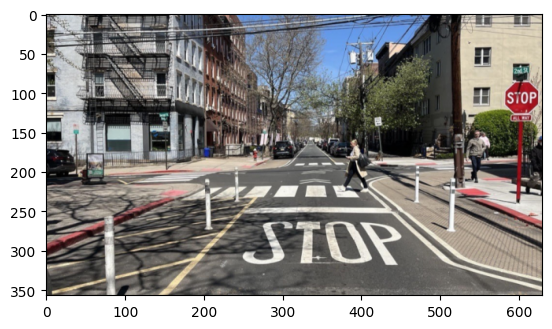

In [6]:
from matplotlib import pyplot as plt

opencv_img = img.permute((1, 2, 0))

plt.imshow(opencv_img)
opencv_img.shape

## Datasets

Another set of useful PyTorch operations presented is the ability to work with "Datasets". PyTorch "datasets" are groups of data with useful operations around. You can make your own datasets or use built in PyTorch datasets.

Built in PyTorch Datasets: https://docs.pytorch.org/vision/stable/datasets.html

The code below will help us download one of the existing datasets

In [13]:
from torchvision import datasets, transforms

flower_set = datasets.Flowers102('../data', download=True, split='test', transform=transforms.ToTensor())

Now what we can do is use a data loader to specify how to read in the values.

In [27]:
from matplotlib import pyplot as plt

dataloader = torch.utils.data.DataLoader(flower_set)

image, label = next(iter(dataloader))
image.shape

torch.Size([1, 3, 500, 523])

tensor([0])

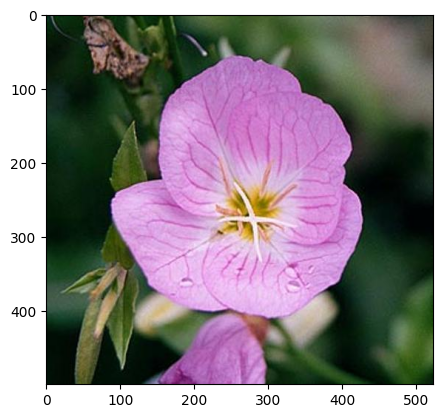

In [28]:
plt.imshow(image[0].permute((1, 2, 0)))
label

## Neural Network Layers

PyTorch also provides a lot of functionalty around making layers for your neural network. A "layer" is essentally a series of of neurons in a configuration you define. It makes it much easier to work with NNs with potentially millions of neurons. Below is an example with a linear makeup of neurons.

In [53]:
# Sample input data
input_data = torch.tensor([[0.0, 1.0, 2.0]])

# Making the layer
layer = torch.nn.Linear(3, 1)

# Providing the weights and bias
layer.weight = torch.nn.Parameter(torch.tensor([[3.0, 4.0, 5.0]]))
layer.bias = torch.nn.Parameter(torch.tensor([3.0]))

# Pass the input through the layer
layer(input_data)

tensor([[17.]], grad_fn=<AddmmBackward0>)

Layers can then easily feed into each other (as long as the shapes of the tensors match)

In [58]:
input_data = torch.tensor([[0.0, 1.0, 2.0]])

layer1 = torch.nn.Linear(3, 2)
layer1.weight = torch.nn.Parameter(torch.tensor([[3.0, 4.0, 5.0], [6.0, 7.0, 8.0]]))
layer1.bias = torch.nn.Parameter(torch.tensor([3.0, 4.0]))

layer2 = torch.nn.Linear(2, 1)
layer2.weight = torch.nn.Parameter(torch.tensor([[1.0, 2.0]]))
layer2.bias = torch.nn.Parameter(torch.tensor([5.0]))

x = layer1(input_data)
x = layer2(x)

x

tensor([[76.]], grad_fn=<AddmmBackward0>)

In [59]:
# Node 1
(0 * 3 + 1 * 4 + 2 * 5) + 3

17

In [60]:
# Node 2
(0 * 6 + 1 * 7 + 2 * 8) + 4

27

In [65]:
# Node 3
(17 * 1 + 27 * 2) + 5

76